In [ ]:
#tide gauge station ID
#https://tidesandcurrents.noaa.gov/sltrends/sltrends_station.shtml?id=9418767
station = nc.Station(9418767)
# Lat Lon Location
lat_s = station.lat_lon['lat']
lon_s = station.lat_lon['lon']

# This makes a map!
m = folium.Map(width=500,height=500,location=[41, -124],zoom_start=8)

# And now let's add a marker on our map for the Tide Gauge location
folium.Marker(
    location=[lat_s, lon_s], # coordinates for the marker
    popup='Station', # pop-up label for the marker
    icon=folium.Icon(),
).add_to(m)

#Display the map
m

In [ ]:
# Choose your start time
start_time = "20160101"
# Choose your end time
end_time = "20160201"

# get tide gauge data
#https://pypi.org/project/noaa-coops/
#https://api.tidesandcurrents.noaa.gov/api/prod/
#https://api.tidesandcurrents.noaa.gov/api/prod/responseHelp.html
df_water_levels = station.get_data(begin_date=start_time, end_date=end_time, product="hourly_height", datum="MLLW", units="metric", time_zone="gmt")
print(df_water_levels)
waterlevels = df_water_levels['v']


                         v      s    f
t                                     
2016-01-01 00:00:00  1.713    NaN  0,0
2016-01-01 01:00:00  1.574  0.053  0,0
2016-01-01 02:00:00  1.346  0.048  0,0
2016-01-01 03:00:00  1.038  0.046  0,0
2016-01-01 04:00:00  0.753  0.040  0,0
...                    ...    ...  ...
2016-01-31 20:00:00  0.830  0.041  0,0
2016-01-31 21:00:00  0.970  0.095  0,0
2016-01-31 22:00:00  1.153  0.093  0,0
2016-01-31 23:00:00  1.311  0.088  0,0
2016-02-01 00:00:00  1.426  0.086  0,0

[745 rows x 3 columns]


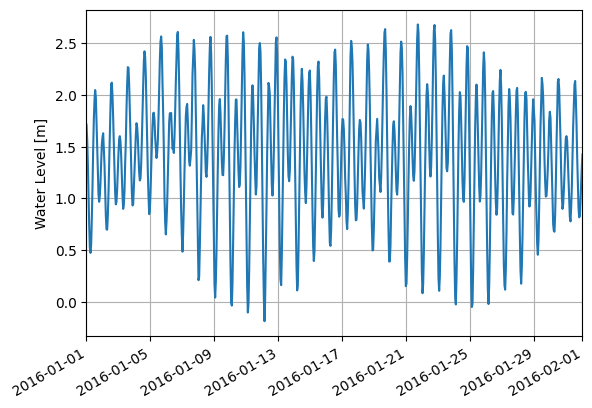

In [ ]:
# plot tide gauge data
plt.figure()
plt.plot(df_water_levels.index,df_water_levels['v'])
plt.gcf().autofmt_xdate()
plt.ylabel('Water Level [m]')
plt.grid(True)

In [ ]:
# define some fuctions that will be useful for finding the waterline
def line(p1, p2):
   A = (p1[1] - p2[1])
   B = (p2[0] - p1[0])
   C = (p1[0]*p2[1] - p2[0]*p1[1])
   return A, B, -C

#function that finds the intersection of two lines
def intersection(L1, L2):
   D = L1[0] * L2[1] - L1[1] * L2[0]
   Dx = L1[2] * L2[1] - L1[1] * L2[2]
   Dy = L1[0] * L2[2] - L1[2] * L2[0]
   if D != 0:
       x = Dx / D
       y = Dy / D
       return x,y
   else:
       return False

#function that finds the waterline
def seaedge(beach_x1,beach_x2,beach_z1,beach_z2,wl):
    beach = line([beach_x1,beach_z1], [beach_x2,beach_z2])
    seasurface = line([beach_x1,wl], [beach_x2,wl])
    seaspot = intersection(beach,seasurface)
    se = seaspot[0]
    return(se)

In [ ]:
# make a fake beach
#beach domain
x1 = -1000
x2 = 500
#beach levels
z1 = -20
z2 = 10
#waterlevel
wl = df_water_levels['v'][0] #test with first waterlevel datapoint

Text(0, 0.5, 'z [m]')

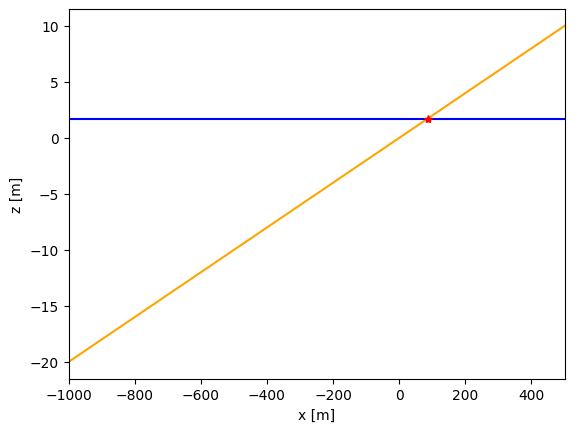

In [ ]:
# test function to make sure it works the way we want
waterline = seaedge(x1,x2,z1,z2,wl)

plt.plot([x1,x2],[z1,z2],'-',color='orange')
plt.plot([x1,x2],[wl,wl],'b-')
plt.plot(waterline,wl,'r*')
plt.xlabel('x [m]')
plt.ylabel('z [m]')
# looks good

Text(0.5, 1.0, 'plane beach')

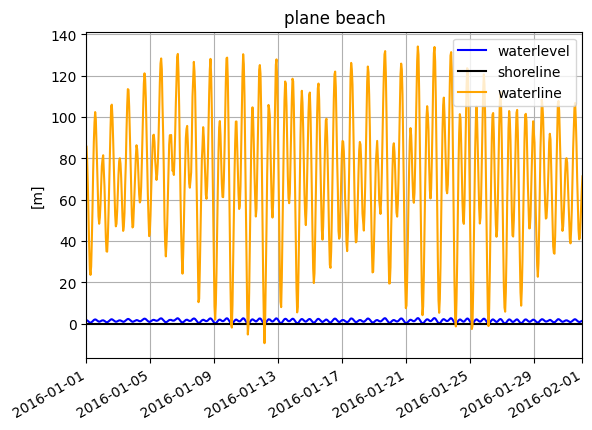

In [ ]:
# use the function to find the waterline for all waterlevels
waterline = []
for wl in waterlevels:
    waterline.append(seaedge(x1,x2,z1,z2,wl))

# compare to the shoreline (not changing but I calculated it this way to double check the function worked)
datumline = np.zeros(np.size(waterlevels.values))
shoreline = []
for d in datumline:
    shoreline.append(seaedge(x1,x2,z1,z2,d))

# plot data
plt.figure()
plt.plot(df_water_levels.index,waterlevels,'b-',label='waterlevel')
plt.plot(df_water_levels.index,shoreline,'k-',label='shoreline')
plt.plot(df_water_levels.index,waterline,'-',color='orange',label = 'waterline')
plt.gcf().autofmt_xdate()
plt.ylabel('[m]')
plt.legend()
plt.grid(True)
plt.title('plane beach')

In [ ]:
#Install Python Packages
!pip install noaa_coops

#Load Python Packages
import noaa_coops as nc
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import scipy

# get rid of x-axis margin in plots
plt.rcParams['axes.xmargin'] = 0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00


In [ ]:
#correlation of waterlevels with waterline, plane beach
r, p = scipy.stats.pearsonr(waterlevels, waterline)
print(r)
print(r**2)

1.0
1.0


Text(0.5, 1.0, 'random evolution plane beach')

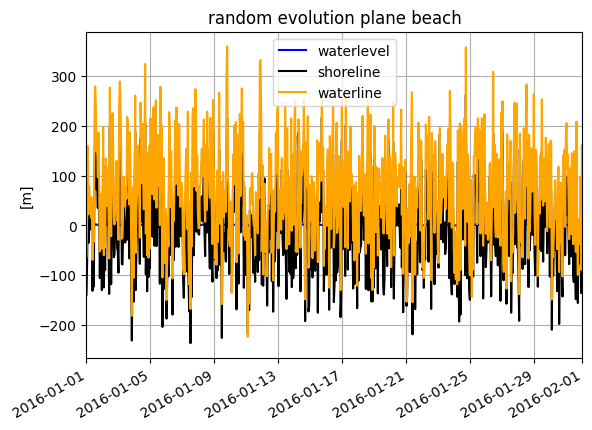

In [ ]:
# now calcualte the waterline and shoreline with a randomly varying plane beach
dx = 200
dz = 2
beachx1 = np.random.uniform(low=(x1-dx), high=(x1+dx), size=(len(waterlevels),))
beachx2 = np.random.uniform(low=(x2-dx), high=(x2+dx), size=(len(waterlevels),))
beachz1 = np.random.uniform(low=(z1-dz), high=(z1+dz), size=(len(waterlevels),)) #this is kinda redundant but whatevs
beachz2 = np.random.uniform(low=(z2-dz), high=(z2+dz), size=(len(waterlevels),)) #this is kinda redundant but whatevs

waterline_random_beach = []
for i in range(len(waterlevels.values)):
    se = seaedge(beachx1[i],beachx2[i],beachz1[i],beachz2[i],waterlevels.values[i])
    waterline_random_beach.append(se)

datumline = np.zeros(np.size(waterlevels.values))
shoreline_random_beach = []
for i in range(len(waterlevels.values)):
    sl = seaedge(beachx1[i],beachx2[i],beachz1[i],beachz2[i],datumline[i])
    shoreline_random_beach.append(sl)

# plot data
plt.figure()
plt.plot(df_water_levels.index,waterlevels,'b-',label='waterlevel')
plt.plot(df_water_levels.index,shoreline_random_beach,'k-',label='shoreline')
plt.plot(df_water_levels.index,waterline_random_beach,'-',color='orange',label = 'waterline')
plt.gcf().autofmt_xdate()
plt.ylabel('[m]')
plt.legend()
plt.grid(True)
plt.title('random evolution plane beach')

In [ ]:
#correlation of waterlevels with waterline, randomly varying plane beach
r, p = scipy.stats.pearsonr(waterlevels, waterline_random_beach)
print(r)
print(r**2)

0.3524233562745336
0.12420222204780683


In [ ]:
#correlation of waterlevels with shoreline, randomly varying plane beach
r, p = scipy.stats.pearsonr(waterlevels, shoreline_random_beach)
print(r)
print(r**2)

0.05522380732871192
0.003049668895878696


If someone wants to take this further we could download a longer record from the tide gauge and see if this randomly varying beach waterline is correlated with an ENSO index. Here is some code to grab and plot the ONI

In [ ]:
# Oceanic Nino Index (ONI)
url = "http://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt" # another potentially useful source: https://github.com/ahuang11/ninodata
oni = pd.read_fwf(url, widths = [5, 5, 7, 7])
# Convert 3 month letters to center month number
month3 = ['DJF', 'JFM', 'FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ']
cnt = 1
for i in month3:
  oni['SEAS'] = oni['SEAS'].replace(i, cnt)
  cnt = cnt+1
# create date_times from month and year
oni['date_time'] = pd.to_datetime(pd.DataFrame({'year': oni['YR'], 'month': oni['SEAS'], 'day': 1}))

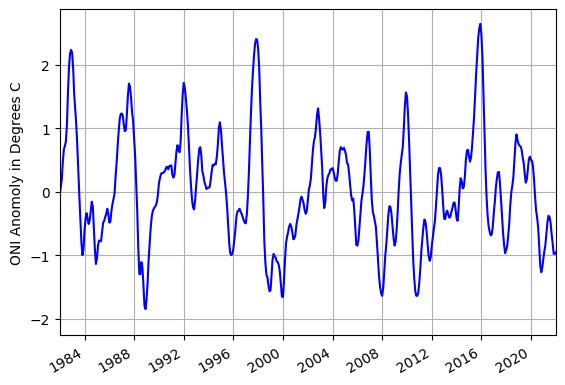

In [ ]:
plt.figure()
plt.plot(oni['date_time'],oni['ANOM'],color='blue')
plt.gcf().autofmt_xdate()
plt.ylabel('ONI Anomoly in Degrees C')
plt.xlim((datetime.date(1982,1,1),(datetime.date(2022,1,1))))
plt.grid(True)